In [26]:
# imports

import os
import sys
import networkx as nx
from pycausal.pycausal import pycausal

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [3]:
aitia = App()

In [18]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.FCI)
algorithm_list.append(aitia.algo_runner.FGES_continuous)
algorithm_list.append(aitia.algo_runner.GFCI_continuous)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [7]:
pc = pycausal()
pc.start_vm()

In [8]:
hepar2_df = aitia.data.hepar2_100_data()
hepar2_df

,alcoholism,vh_amn,hepatotoxic,THepatitis,hospital,surgery,gallstones,choledocholithotomy,injections,transfusion,...,spiders,jaundice,albumin,edge,irregular_liver,hbc_anti,hcv_anti,palms,hbeag,carcinoma
0,-0.420084,-0.436436,-0.351562,-0.252646,-1.105542,-0.904534,1.939563,2.064742,-0.868554,-0.403473,...,-0.531085,1.564697,-0.897166,-0.701810,2.708013,-0.333333,0.0,2.380476,0.0,-0.229416
1,-0.420084,-0.436436,-0.351562,-0.252646,-1.105542,1.105542,1.939563,2.064742,-0.868554,-0.403473,...,1.882938,1.564697,0.526907,1.424887,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
2,-0.420084,-0.436436,-0.351562,-0.252646,-1.105542,1.105542,-0.515580,-0.484322,1.151339,-0.403473,...,1.882938,-0.639101,0.526907,-0.701810,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
3,-0.420084,-0.436436,-0.351562,-0.252646,-1.105542,-0.904534,-0.515580,-0.484322,-0.868554,-0.403473,...,1.882938,-0.639101,0.526907,-0.701810,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
4,-0.420084,2.291288,-0.351562,-0.252646,-1.105542,-0.904534,-0.515580,-0.484322,-0.868554,-0.403473,...,-0.531085,-0.639101,0.526907,-0.701810,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.420084,-0.436436,-0.351562,-0.252646,0.904534,-0.904534,-0.515580,-0.484322,-0.868554,-0.403473,...,-0.531085,-0.639101,-2.321240,-0.701810,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
96,-0.420084,-0.436436,-0.351562,-0.252646,0.904534,-0.904534,1.939563,2.064742,1.151339,-0.403473,...,1.882938,1.564697,0.526907,1.424887,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
97,-0.420084,2.291288,-0.351562,-0.252646,-1.105542,-0.904534,-0.515580,-0.484322,-0.868554,-0.403473,...,-0.531085,-0.639101,0.526907,-0.701810,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416
98,-0.420084,-0.436436,-0.351562,-0.252646,-1.105542,1.105542,-0.515580,-0.484322,-0.868554,-0.403473,...,-0.531085,-0.639101,0.526907,-0.701810,-0.369274,-0.333333,0.0,-0.420084,0.0,-0.229416


In [13]:
feature_list = aitia.features.get_reduced_feature_list(hepar2_df, 10)
feature_list

['fibrosis',
 'le_cells',
 'consciousness',
 'fat',
 'pain',
 'irregular_liver',
 'hcv_anti',
 'THepatitis',
 'hbeag',
 'amylase']

In [14]:
df_reduced =  aitia.features.get_reduced_dataframe(hepar2_df, feature_list)
df_reduced

,fibrosis,le_cells,consciousness,fat,pain,irregular_liver,hcv_anti,THepatitis,hbeag,amylase
0,-0.204124,-0.204124,-0.204124,-0.531085,-0.484322,2.708013,0.0,-0.252646,0.0,0.057831
1,-0.204124,-0.204124,-0.204124,-0.531085,-0.484322,-0.369274,0.0,-0.252646,0.0,0.057831
2,-0.204124,4.898979,-0.204124,1.882938,-0.484322,-0.369274,0.0,-0.252646,0.0,0.057831
3,-0.204124,-0.204124,-0.204124,-0.531085,-0.484322,-0.369274,0.0,-0.252646,0.0,0.057831
4,-0.204124,-0.204124,-0.204124,-0.531085,-0.484322,-0.369274,0.0,-0.252646,0.0,0.057831
...,...,...,...,...,...,...,...,...,...,...
95,-0.204124,-0.204124,-0.204124,-0.531085,-0.484322,-0.369274,0.0,-0.252646,0.0,0.057831
96,-0.204124,-0.204124,-0.204124,-0.531085,2.064742,-0.369274,0.0,-0.252646,0.0,0.057831
97,-0.204124,-0.204124,-0.204124,1.882938,-0.484322,-0.369274,0.0,-0.252646,0.0,0.057831
98,-0.204124,-0.204124,-0.204124,1.882938,-0.484322,-0.369274,0.0,-0.252646,0.0,0.057831


In [16]:
target_str_dot = aitia.data.hepar2_graph()

In [19]:
analysis_results, summary = aitia.run_causal_discovery(df_reduced, target_str_dot, algorithm_list, pc)
summary

,Algorithm,AUPR,SHD
0,PC,0.012551,142
1,FCI,0.012551,142
2,FGES-continuous,0.012551,125
3,GFCI-continuous,0.012551,125
4,RFCI-continuous,0.012551,142


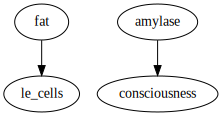

In [32]:
analysis_results[2]['causal_graph'].draw()

In [30]:
target_csm = aitia.graph_util.get_causal_graph_from_dot(target_str_dot)

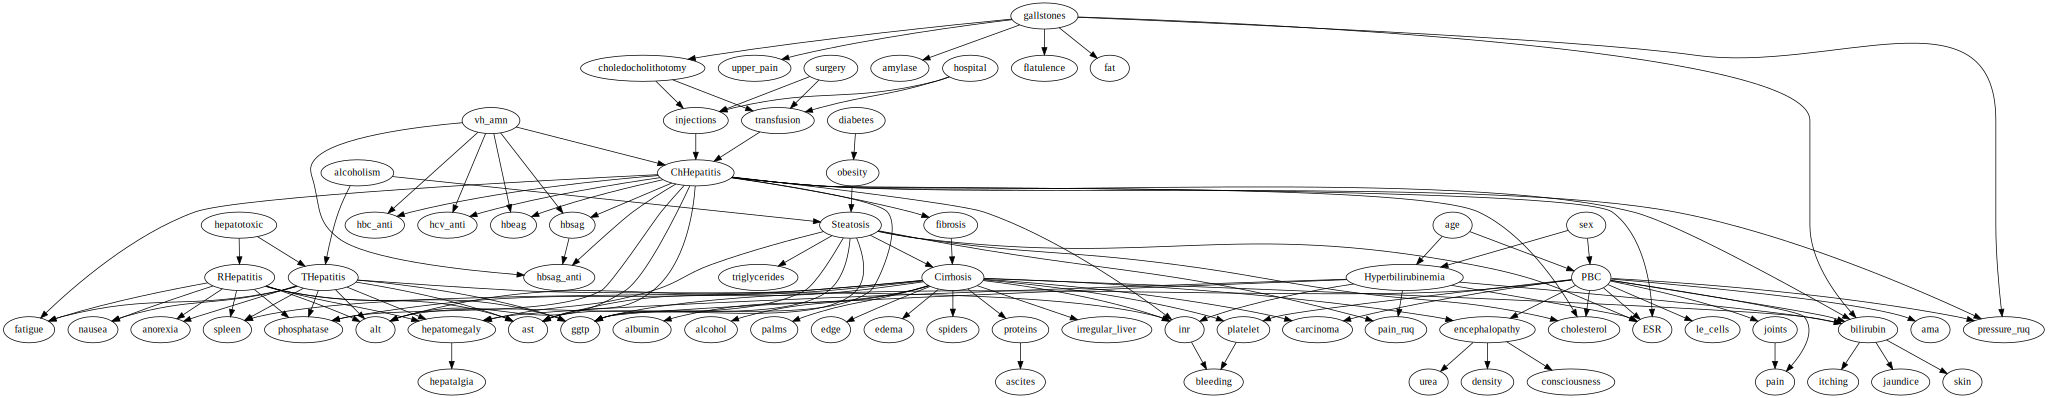

In [31]:
target_csm.draw()